In [22]:
import pandas as pd

In [24]:
train= pd.read_csv('creditcard.csv')#read_csv('Downloads/creditcard.csv')
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


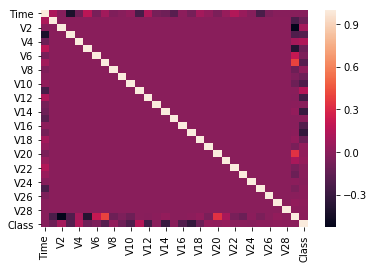

In [25]:
import seaborn as sns
sns.heatmap(train.corr())

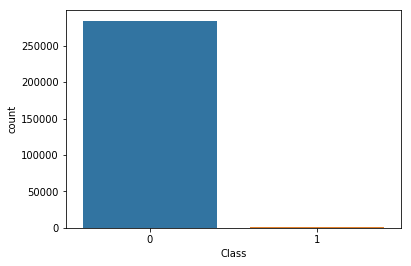

In [26]:
sns.countplot(train['Class'])

In [ ]:
from sklearn.preprocessing import StandardScaler
train['Amount_n']= StandardScaler().fit_transform(train['Amount'].reshape(-1,1))

In [9]:
train.head()

,1,0,-1.3598071337,-0.0727811733,2.536346738,1.3781552243,-0.3383207699,0.4623877778,0.2395985541,0.0986979013,...,0.090794172,-0.5515995333,-0.6178008558,-0.9913898472,-0.3111693537,1.4681769721,-0.4704005253,0.2079712419,0.0257905802,0.4039929603
0,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783
1,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857
2,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622
3,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487
4,6,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194


In [10]:
train['Time_H']= train['Time']/3600

KeyError: 'Time'

In [11]:
sns.distplot(train['Time_H'])

KeyError: 'Time_H'

In [12]:
sns.countplot(train['class'])

KeyError: 'Class'

In [19]:
sns.jointplot(train['class'])

KeyError: 'Time_H'

In [14]:
train= train.drop(['Time','Time_H','Amount'], axis=1)
train.head()

KeyError: "labels ['Time' 'Time_H' 'Amount'] not contained in axis"

In [15]:
X= train.ix[:, train.columns != 'Class']
y= train.ix[:, train.columns == 'Class']   

C:\Users\HP\Anaconda3\New folder\New folder\New folder\aaa\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\New folder\New folder\New folder\aaa\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [ ]:
fraud_count = len(train[train.Class == 1])
fraud_indices = train[train.Class == 1].index
normal_indices = train[train.Class == 0].index

r_normal_indices = np.random.choice(normal_indices, fraud_count, replace = False) # random 

undersample_indices = np.concatenate([fraud_indices,r_normal_indices])
undersample_train = train.iloc[undersample_indices,:]

X_undersample = undersample_train.ix[:, undersample_train.columns != 'Class']
y_undersample = undersample_train.ix[:, undersample_train.columns == 'Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
X_tr_u, X_test_u, y_tr_u, y_test_u = train_test_split(X_undersample,y_undersample,test_size = 0.3,random_state = 0)
                                                                                                   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,recall_score,classification_report,precision_recall_curve, roc_curve
import matplotlib.pylab as plt
% matplotlib inline

In [ ]:
logreg = LogisticRegression(C = .01, penalty = 'l1')
logreg.fit(X_tr_u,y_tr_u.values.ravel())
y_pred_u= logreg.predict(X_test_u)
y_pred_u_proba=logreg.predict_proba(X_test_u)
print('cm:', confusion_matrix(y_test_u,y_pred_u))
print('cr:', classification_report(y_test_u,y_pred_u))
print('recall_score:', recall_score(y_test_u,y_pred_u))
print('roc_auc_score:',roc_auc_score(y_test_u,y_pred_u))

In [ ]:
y_predprob_u = logreg.predict_proba(X_test_u)[:, 1]  # default threshold 0.5

plt.hist(y_predprob_u, bins=8)
plt.xlabel('predicted probability of fraud')
plt.ylabel('frequency')
plt.title('Histogram of predicted probabilities') 

In [30]:
logreg.fit(X_tr_u,y_tr_u.values.ravel())
y_pred_u_proba = logreg.predict_proba(X_test_u)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in thresholds:
    y_test_pred_prob = y_pred_u_proba[:,1] > i
    precision, recall, thresholds= precision_recall_curve(y_test_u,y_test_pred_prob)
    plt.plot(recall, precision,label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('Precision-Recall curve')    
    plt.legend(loc='center left')

NameError: name 'logreg' is not defined

In [33]:
#In order to increase recall(sensitivity), we need to decrease the threshold of the classifier
fpr, tpr, thresholds = roc_curve(y_test_u,y_predprob_u)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve for fraud classifier')
plt.grid(True)

NameError: name 'roc_curve' is not defined

In [ ]:
roc_auc_score(y_test_u, y_predprob_u)

In [ ]:
#Decrease the threshold(0.3)for predicting frauds in order to increase the sensitivity of the classifier
from sklearn.preprocessing import binarize
y_pred_class_u_highrecall = binarize([y_predprob_u], 0.3)[0]
print('cm:', confusion_matrix(y_test_u,y_pred_class_u_highrecall))
print('cr:', classification_report(y_test_u,y_pred_class_u_highrecall))
print('recall_score:', recall_score(y_test_u,y_pred_class_u_highrecall))
print('roc_auc_score:',roc_auc_score(y_test_u,y_pred_class_u_highrecall))

In [ ]:
logreg.fit(X_tr_u,y_tr_u.values.ravel())
y_pred= logreg.predict_proba(X_test)[:,1]    #predicted probabilities for class 1                                          
y_pred_class_highrecall = binarize([y_pred], 0.3)[0]
print('cm:', confusion_matrix(y_test,y_pred_class_highrecall))
print('cr:', classification_report(y_test,y_pred_class_highrecall))
print('recall_score:', recall_score(y_test,y_pred_class_highrecall))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_class_highrecall))

In [ ]:
logreg.fit(X_tr_u,y_tr_u.values.ravel())
y_pr= logreg.predict_proba(X)[:,1]    #predicted probabilities for class 1                                          
y_pr_class_highrecall = binarize([y_pr], 0.3)[0]
print('cm:', confusion_matrix(y,y_pr_class_highrecall))
print('cr:', classification_report(y,y_pr_class_highrecall))
print('recall_score:', recall_score(y,y_pr_class_highrecall))
print('roc_auc_score:',roc_auc_score(y,y_pr_class_highrecall))